# EDA & Feature Engineering

## Library & Data Imports

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('final_data.csv', index_col=0)
data.head()

,name,year_published,min_players,max_players,playing_time,min_play_time,max_play_time,min_age,users_rated,average_rating,...,mechanic_storytelling,mechanic_take_that,mechanic_tile_placement,mechanic_time_track,mechanic_trading,mechanic_trick-taking,mechanic_variable_phase_order,mechanic_variable_player_powers,mechanic_voting,mechanic_worker_placement
0,"Warhammer 40,000: Heroes of Black Reach",2018.0,2.0,2.0,120.0,30.0,120.0,14.0,11,7.63636,...,0,0,0,0,0,0,0,0,0,0
1,The Russo-Georgian War of 2008,2010.0,1.0,2.0,90.0,90.0,90.0,12.0,9,7.22222,...,0,0,0,0,0,0,0,0,0,0
2,Frher oder Spter,2009.0,2.0,5.0,30.0,30.0,30.0,8.0,2,4.50000,...,0,0,0,0,0,0,0,0,0,0
5,Wings Over France,1992.0,1.0,1.0,60.0,60.0,60.0,10.0,50,7.50000,...,0,0,0,0,0,0,0,0,0,0
9,Mothra vs. Godzilla,1982.0,2.0,2.0,90.0,90.0,90.0,10.0,7,6.98143,...,0,0,0,0,0,0,0,0,0,0


### Category & Mechanic Feature Combination
To start with, in an attempt to reduce some of my dimensionality, as well as reduce some of the extraneous categories and possibly mechanics, I'm going to go through and combine all of the War-related categories into Wargames, and investigate other possible combinations of both categories and mechanics.

In [3]:
war_cats = [col for col in data.columns if 'war' in col]
war_cats

['category_american_civil_war',
 'category_american_indian_wars',
 'category_american_revolutionary_war',
 'category_civil_war',
 'category_korean_war',
 'category_modern_warfare',
 'category_vietnam_war',
 'category_wargame',
 'category_world_war_i',
 'category_world_war_ii']

In [4]:
#As Modern Warfare could be categorically different from a Wargame, I want to remove it from the combination.
war_cats.remove('category_modern_warfare')

In [5]:
def category_combine(df, columns=None, final_column=None):
    for col in columns:
        if col != final_column:
            for i, row in df.iterrows():
                if df.at[i, col] == 1:
                    df.at[i, final_column] = 1
            df.drop(columns=col, inplace=True)

In [6]:
category_combine(data, columns=war_cats, final_column='category_wargame')

### Further Feature Reduction & Adjustment
Upon further inspection of the dataset and BoardGameGeek, it looks like playing_time is always equal to max_play_time, so I will drop playing_time. I'm also dropping users_rated, total_owners, and total_weights, and will fill the blank average weights with the best option of mean, median, or mode.

In [7]:
data.drop(columns=['playing_time', 'users_rated', 'total_owners', 'total_weights'], inplace=True)

In [8]:
data.average_weight.replace(0, np.nan, inplace=True)
print('Mean:', data.average_weight.mean())
print('Median:', data.average_weight.median())
print('Mode:', data.average_weight.mode())

Mean: 1.91252641189474
Median: 2.0
Mode: 0    1.0
dtype: float64


In [9]:
data.average_weight.fillna(data.average_weight.mean(), inplace=True)

### EDA

In [10]:
list(data.columns)

['name',
 'year_published',
 'min_players',
 'max_players',
 'min_play_time',
 'max_play_time',
 'min_age',
 'average_rating',
 'average_weight',
 'category_abstract_strategy',
 'category_action_/_dexterity',
 'category_adventure',
 'category_age_of_reason',
 'category_american_west',
 'category_ancient',
 'category_animals',
 'category_arabian',
 'category_aviation_/_flight',
 'category_bluffing',
 'category_book',
 'category_card_game',
 "category_children's_game",
 'category_city_building',
 'category_civilization',
 'category_collectible_components',
 'category_comic_book_/_strip',
 'category_deduction',
 'category_dice',
 'category_economic',
 'category_educational',
 'category_electronic',
 'category_environmental',
 'category_expansion_for_base-game',
 'category_exploration',
 'category_fan_expansion',
 'category_fantasy',
 'category_farming',
 'category_fighting',
 'category_game_system',
 'category_horror',
 'category_humor',
 'category_industry_/_manufacturing',
 'category_ma

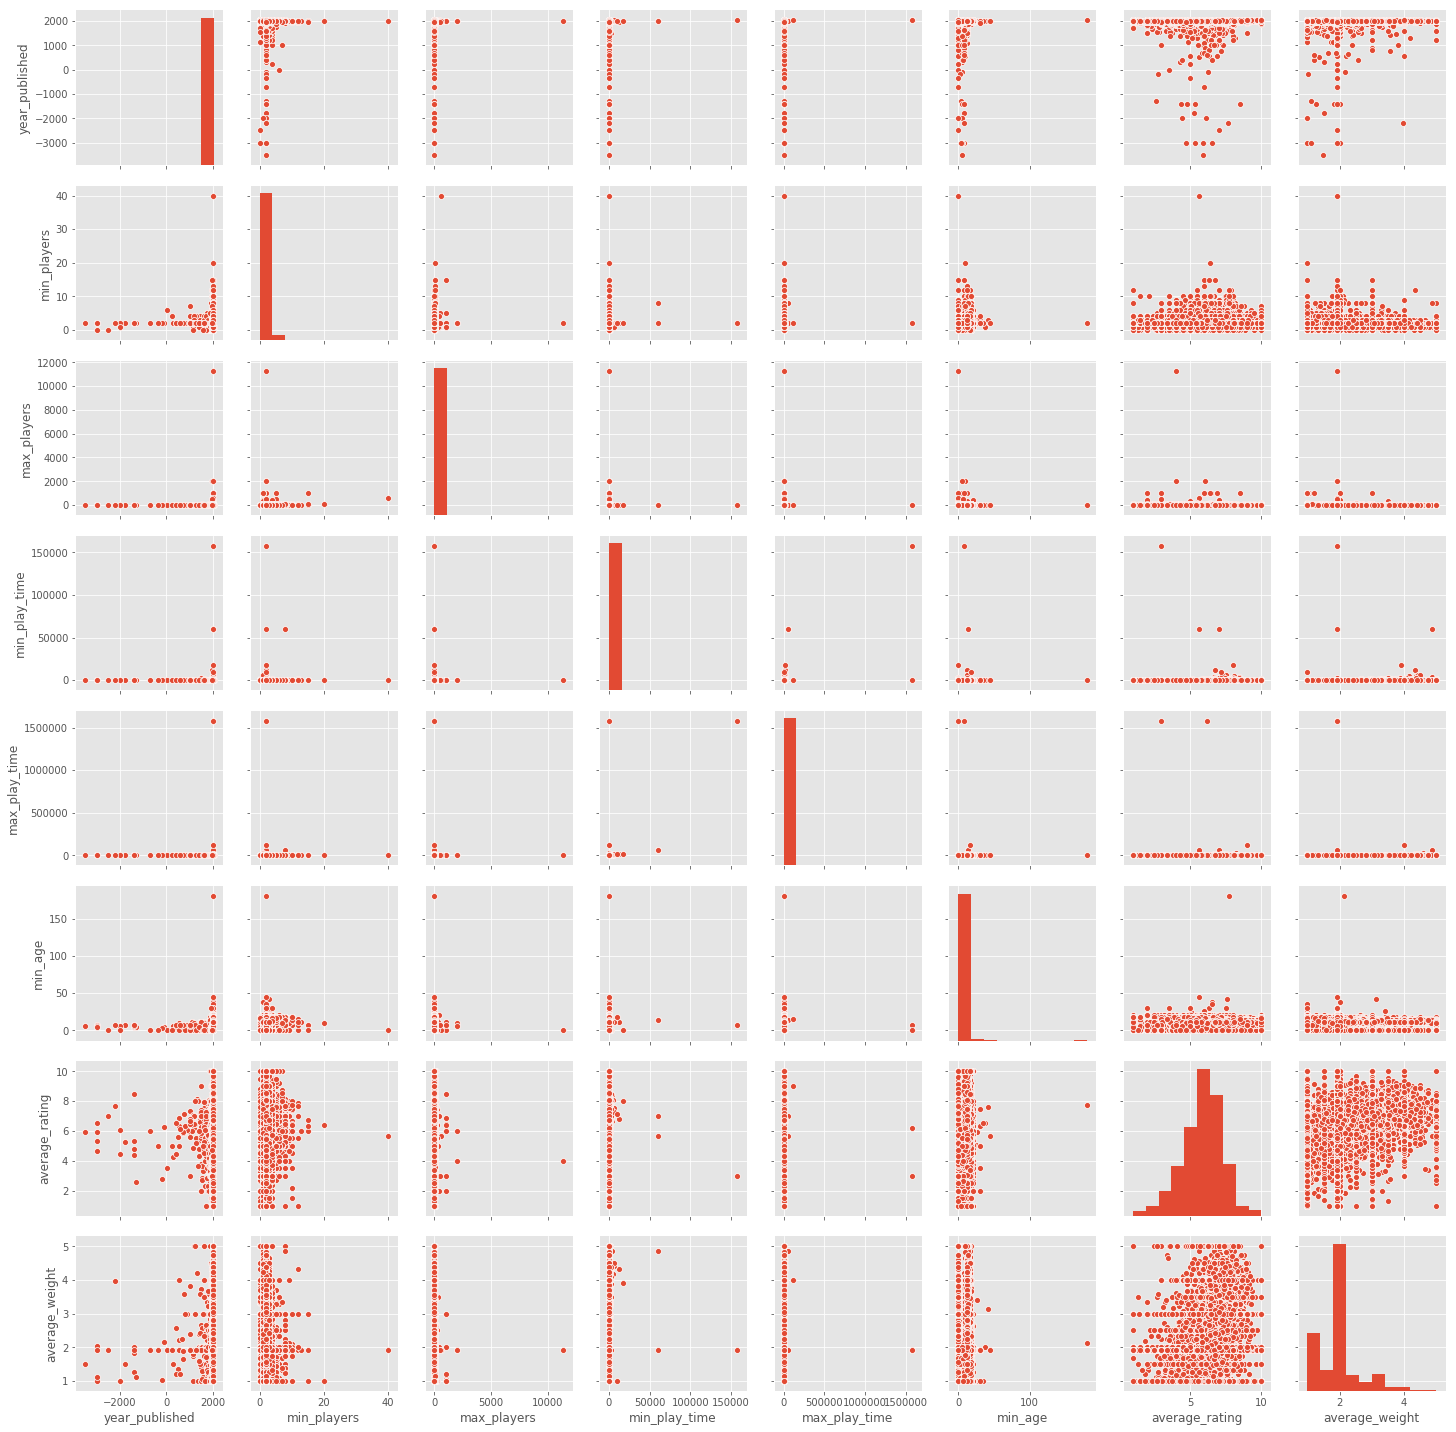

In [11]:
base_features = data[['year_published', 'min_players',  'max_players',
                      'min_play_time', 'max_play_time', 'min_age',
                      'average_rating', 'average_weight']]
sns.pairplot(base_features)

In [12]:
categories = data[[col for col in data.columns if 'category' in col]]

In [13]:
mechanics = data[[col for col in data.columns if 'mechanic' in col]]